In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

diabetes_data = pd.read_csv("C:/Users/Sandhya/OneDrive/Uniadelaide/Sem2/Deep learning/Assignment 1/"
                   "diabetes.csv")

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = ['Outcome']
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Pre-Processing Data

In [6]:
for column in diabetes_data:    
    sorted_col = diabetes_data.sort_values(column)    
    x_max = sorted_col[column].iloc[-1]    
    x_min = sorted_col[column].iloc[0]    
    range_x = x_max - x_min    
    for i in range(diabetes_data.shape[0]):
        diabetes_data.loc[i, column] = (diabetes_data[column][i] - x_min) / range_x        
diabetes_data.head()
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


#### Splitting into training data and test data¶

In [5]:
training = diabetes_data.loc[:(768 * 80 // 100)]
test = diabetes_data.loc[(768 * 80 // 100 + 1):]

x_training, y_training = training[features].values, training[target].values
x_test, y_test = test[features].values, test[target].values
print(x_training.shape, y_training.shape)
print(x_test.shape, y_test.shape)


(615, 8) (615, 1)
(153, 8) (153, 1)


In [7]:
# Make a prediction with weights

def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation > 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]    # Weights[0] is bias
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return predictions

l_rate = 0.1
n_epoch = 50
predicted = perceptron(training.values, test.values, l_rate, n_epoch)

for i in range(10):
    print(f'Predicted: {predicted[i]}, Actual:{y_test[i][0]}')

>epoch=0, lrate=0.100, error=215.000
>epoch=1, lrate=0.100, error=194.000
>epoch=2, lrate=0.100, error=191.000
>epoch=3, lrate=0.100, error=194.000
>epoch=4, lrate=0.100, error=186.000
>epoch=5, lrate=0.100, error=190.000
>epoch=6, lrate=0.100, error=192.000
>epoch=7, lrate=0.100, error=184.000
>epoch=8, lrate=0.100, error=204.000
>epoch=9, lrate=0.100, error=190.000
>epoch=10, lrate=0.100, error=180.000
>epoch=11, lrate=0.100, error=188.000
>epoch=12, lrate=0.100, error=188.000
>epoch=13, lrate=0.100, error=194.000
>epoch=14, lrate=0.100, error=185.000
>epoch=15, lrate=0.100, error=183.000
>epoch=16, lrate=0.100, error=180.000
>epoch=17, lrate=0.100, error=190.000
>epoch=18, lrate=0.100, error=188.000
>epoch=19, lrate=0.100, error=194.000
>epoch=20, lrate=0.100, error=187.000
>epoch=21, lrate=0.100, error=195.000
>epoch=22, lrate=0.100, error=186.000
>epoch=23, lrate=0.100, error=184.000
>epoch=24, lrate=0.100, error=190.000
>epoch=25, lrate=0.100, error=190.000
>epoch=26, lrate=0.100

In [14]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i][0] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) 

accuracy = accuracy_metric(y_test,predicted)
print(f'Accuracy = {accuracy}')

Accuracy = 0.7777777777777778


C:\Users\Sandhya\Anaconda3_latest\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandhya\Anaconda3_latest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Sandhya\Anaconda3_latest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixD

              precision    recall  f1-score   support

           0       0.71      0.03      0.07       143
           1       0.38      0.98      0.55        88

    accuracy                           0.39       231
   macro avg       0.55      0.51      0.31       231
weighted avg       0.59      0.39      0.25       231



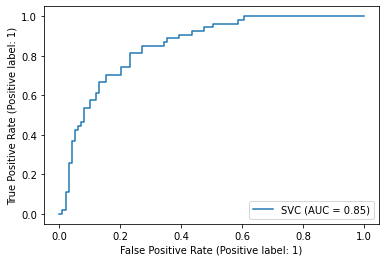

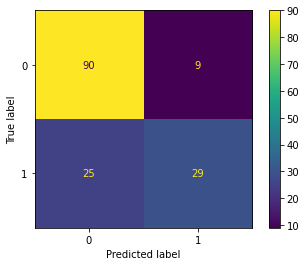

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report,plot_confusion_matrix

clf_SVM=SVC(C=1,kernel='rbf')
clf_SVM.fit(x_training,y_training)
print (classification_report(Y_test,clf_SVM.predict(X_test)))
plot_roc_curve(clf_SVM,x_test, y_test)
plot_confusion_matrix(clf_SVM,x_test,y_test)

### Applying perceptron algorithm to the Sonar Dataset 

In [15]:
from random import seed
from random import randrange
from csv import reader
 
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) 

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights
 
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)
 
# Test the Perceptron algorithm on the sonar dataset
seed(1)
# load and prepare data
filename = 'sonar data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))    



Scores: [0.7681159420289855, 0.6956521739130435, 0.7246376811594203]
Mean Accuracy: 0.729%


### Perceptron implementation using Sklearn inbuilt Perceptron function

In [7]:
import pandas as pd
from sklearn.linear_model import Perceptron


if __name__ == "__main__":
    # Load the Pima diabetes dataset from CSV
    # and convert into a NumPy matrix suitable for
    # extraction into X, y format needed for Scikit-Learn
    diabetes = pd.read_csv('diabetes.csv').values

    # Extract the feature columns and outcome response
    # into appropriate variables
    X = diabetes[:, 0:8]
    y = diabetes[:, 8]

    # Create and fit a perceptron model (with reproducible
    # random seed)
    model = Perceptron(random_state=1)
    model.fit(X, y)

    # Output the (in sample) mean accuracy score
    # of the classification
    print("%0.3f" % model.score(X, y))

0.531
